In [1]:
# ! pip install ultralytics
# !pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu128

In [2]:
import torch
torch.cuda.is_available()

True

In [6]:
# yaml_path = r"E:\ICAR\Soyplants.v2-onecatdata.yolov12\data.yaml"
yaml_path = r"E:\ICAR\4classFinalData\data.yaml"
insect_name = "allInsects"

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")   # try yolov8s.pt, m , YOLOv8x (X-Large) if you have stronger GPU

# fine-tune on your dataset
model.train(
    data=yaml_path,  # path to your YAML
    name=insect_name, # experiment name (outputs saved in runs/detect/soy_damage_ft/)
    epochs=50,           # adjust (start with 50–100)
    imgsz=640,           # input image size
    batch=16,             # adjust based on GPU memory
    save_period=5,
    project=r"E:\ICAR\for4Categories",   # ✅ custom base path
    device=0,
    patience = 10,
    # optimizer = 'AdamW',
    cache = True,          # cache images for faster training

    workers = 8,      # threads/2
    lr0 = 0.01,          # initial learning rate 
    lrf = 0.1,           # final learning rate
    weight_decay = 0.0005,
    warmup_epochs = 5,

    hsv_s = 0.6,  # image HSV-Saturation augmentation (fraction)
    hsv_v = 0.35,  # image HSV-Value augmentation (fraction
    hsv_h = 0.015,  # image HSV-Hue augmentation (fraction
    translate = 0.1,  # image translation augmentation (fraction)
    scale = 0.5,  # image scale augmentation (fraction)
    shear = 20,  # image shear augmentation (fraction
    flipud = 0.0,  # image flip up-down augmentation (probability )
    fliplr = 0.5,  # image flip left-right augmentation (probability
    mosaic = 1.0,  # image mosaic augmentation (probability)
    copy_paste = 0.0,  # image copy-paste augmentation (probability
)


New https://pypi.org/project/ultralytics/8.3.205 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.204  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=E:\ICAR\4classFinalData\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.6, hsv_v=0.35, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=allInsects4, 

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000265A4DD77D0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
       

In [ ]:
# model = YOLO(r"E:\ICAR\checkpoints\soy_damage_best.pt")
# model.train(resume=True)


In [8]:
from ultralytics import YOLO

# load the fine-tuned model
model = YOLO(r"E:\ICAR\checkpoints\soy_damage_ft\weights\best.pt")

# evaluate on validation set
metrics = model.val()   # uses valid set from your YAML
print(metrics)

# OR evaluate on your test split explicitly
metrics_test = model.val(data=r"E:\ICAR\Soyplants.v2-onecatdata.yolov12\data.yaml", split="test")
print(metrics_test)


Ultralytics 8.3.204  Python-3.11.0 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access  (ping: 0.20.1 ms, read: 754.0177.3 MB/s, size: 745.0 KB)
val: Scanning E:\ICAR\Soyplants.v2-onecatdata.yolov12\valid\labels.cache... 159 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 159/159 158.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 1.9it/s 5.4s.3ss
                   all        159        159      0.973      0.962      0.963      0.733
Speed: 1.8ms preprocess, 8.1ms inference, 0.1ms loss, 4.8ms postprocess per image
Results saved to E:\ICAR\runs\detect\val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000026A18A85610>
curves:


image 1/1 E:\ICAR\SampleDAta\While Fly Damaged\IMG20250725095645_BURST006.jpg: 480x640 1 White Fly, 19.8ms
Speed: 5.5ms preprocess, 19.8ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to E:\ICAR\runs\detect\predict5


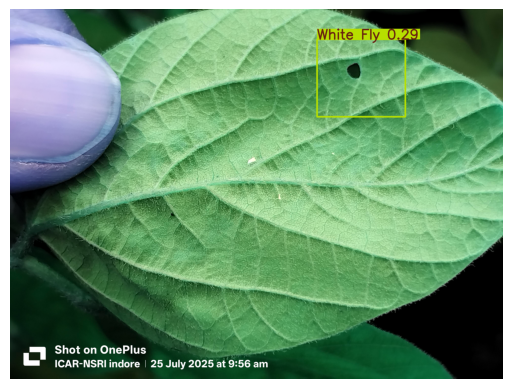

In [ ]:
%matplotlib inline
from ultralytics import YOLO
from matplotlib import pyplot as plt

model = YOLO(r"E:\ICAR\for4Categories\allInsects4\weights\best.pt")

# run prediction on test images
results = model.predict(
    source=r"E:\ICAR\SampleDAta\While Fly Damaged\IMG20250725095645_BURST006.jpg",
    conf=0.25,     # confidence threshold
    save=True      # saves images with boxes in runs/detect/predict/
)

# Display the first result image in the notebook
result = results[0]
plt.imshow(result.plot())   # draws bounding boxes on image
plt.axis('off')
plt.show()

## Can use for labeling purpose


In [ ]:
model_path = r"E:\ICAR\checkpoints\soy_damage_ft\weights\best.pt"
to_label_dir = r"E:\ICAR\Soyplants.v2-onecatdata.yolov12\test\images"

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO(model_path)

# Run prediction for labeling
results = model.predict(
    source=to_label_dir,  # directory with images to label
    conf=0.25,                # confidence threshold
    save=False,               # ❌ no full images with boxes
    save_txt=True,            # ✅ save labels in txt files
    save_conf=False,          # save confidences if True
    save_crop=True,           # ✅ save cropped objects
    project=f"prediction/runs/predict",   # main directory for saving
    name="insect_name",              # subfolder name inside project
    exist_ok=True  
)
